### **Task I: Quantum Computing Part**

1. Implement a simple quantum operation with Cirq

    * With 5 qubits
    * Apply Hadamard operation on every qubit
    * Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    * SWAP (0, 4)
    * Rotate X with pi/2
    * Plot the circuit


2. Create a circuit that is a series of small cirq.Rx rotations and plot the probability
of measuring the state in the $|0\rangle$ state.

In [ ]:
# Install Cirq
! pip install cirq

In [16]:
import cirq
from cirq import H, CNOT, SWAP, rx, measure
import numpy as np
import matplotlib.pyplot as plt

#### I.1

In [3]:
qubit = [cirq.LineQubit(x) for x in range(5)]

def assemble_circ():

  for i in range(5):
    yield H(qubit[i])

  for i, j in zip(range(0, 4), range(1, 5)):
    yield CNOT(qubit[i], qubit[j])

  yield SWAP(qubit[0], qubit[4])
  yield rx(0.5 * np.pi)(qubit[0]) # The question did not specify which qubit to apply the RX gate on

In [4]:
circuit = cirq.Circuit(assemble_circ())

In [5]:
print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


#### I.2

Text(0.5, 0, 'Steps')

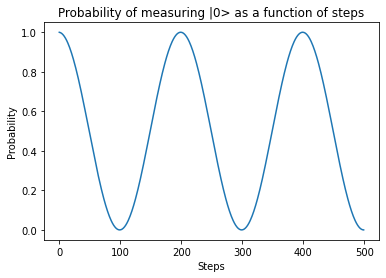

In [18]:
qubit = cirq.LineQubit(0)
circuit = cirq.Circuit([rx(np.pi/100)(qubit) for _ in range(500)])

simulator = cirq.Simulator()
'''
We can use the simulate_moment_steps method to get the state of the qubit at each step and then find the probability. 
This probability can be stored in a list named probabs, which is then plotted. We expect to see a sinusoidal variation in 
the probability of measuring |0>
'''

probabs = []

for step in simulator.simulate_moment_steps(circuit=circuit):
  prob = np.abs(step.state_vector())**2
  probabs.append(prob[0])

plt.plot(probabs)
plt.title('Probability of measuring |0> as a function of steps')
plt.ylabel('Probability')
plt.xlabel('Steps')